In [25]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [26]:
data=pd.read_excel('ANTIBIOTIC ANTIFUNGAL ANTIVIRAL.xlsx',sheet_name='Sheet1',header=[0])
data

,KODE PRODUK,BULAN,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Cluster
0,NaN,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,NaN
1,04073,37,49,25,8,103,60,89,23,44,...,13,54,39,10,34,30,36,26,29,2.0
2,18051,63,40,6,26,23,9,-1,51,18,...,0,5,3,2,-2,4,7,17,0,1.0
3,04176,29,21,19,14,40,6,14,2,14,...,-17,0,19,10,0,0,11,5,1,2.0
4,18085,112,141,35,39,145,15,57,63,45,...,1294,30,966,384,1017,1270,623,511,47,2.0
5,04177,76,44,66,56,91,35,65,47,32,...,26,47,17,32,31,53,56,35,52,2.0
6,04125,76,50,45,19,69,41,64,75,76,...,48,50,43,57,63,51,50,40,64,2.0
7,04132,5,42,27,16,25,20,28,11,38,...,0,0,0,0,0,4,19,3,9,2.0
8,04167,29,14,46,20,10,15,27,20,49,...,10,10,17,22,16,47,45,30,7,2.0
9,04148,20,8,14,2,15,5,19,9,26,...,4,1,2,3,0,1,2,1,5,2.0


In [27]:
data.rename(data.iloc[0,1:-1],axis=1,inplace=True)
data = data.loc[1:,:]

In [28]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [29]:
#now lets take clusters
c1 = data.query("Cluster == 1")
print("Jumlah Produk:")
print(c1['KODE PRODUK'].size)
c2 = data.query("Cluster == 2")
print("Jumlah Produk:")
print(c2['KODE PRODUK'].size)


Jumlah Produk:
5
Jumlah Produk:
12


In [30]:
#oke ada ternyata yang cuman sendirian (1 product di cluster tersebut), kita beresin dia dulu, the easiest, dan biar keliatan kita
#ngapain aja di time series ini
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)
# ini fungsinya buat nge ubah dataset jadi windowed

In [31]:
# Time data into windows
def time_data(data, window):
  x = []
  y = []
  for i in range((len(data)-1)-window-1):
    x.append(data[i:(i+window),0])
    y.append(data[i+window,0])
  return np.array(x),np.array(y)

In [59]:
col = c2['KODE PRODUK'].values
col

KeyError: 'KODE PRODUK'

In [ ]:
#next kita ubah bentuk data nya dari yang tadinya kesamping jadi ke bawah, tapi pertama mau aku drop dulu cluster sama kode produknya
c2=c2.drop(columns=['KODE PRODUK','Cluster'])
c2

,1,2,3,4,5,6,7,8,9,10,...,45,46,47,48,49,50,51,52,53,54
1,37,49,25,8,103,60,89,23,44,43,...,12,13,54,39,10,34,30,36,26,29
3,29,21,19,14,40,6,14,2,14,8,...,5,-17,0,19,10,0,0,11,5,1
4,112,141,35,39,145,15,57,63,45,90,...,626,1294,30,966,384,1017,1270,623,511,47
5,76,44,66,56,91,35,65,47,32,98,...,17,26,47,17,32,31,53,56,35,52
6,76,50,45,19,69,41,64,75,76,65,...,50,48,50,43,57,63,51,50,40,64
7,5,42,27,16,25,20,28,11,38,48,...,0,0,0,0,0,0,4,19,3,9
8,29,14,46,20,10,15,27,20,49,33,...,13,10,10,17,22,16,47,45,30,7
9,20,8,14,2,15,5,19,9,26,15,...,2,4,1,2,3,0,1,2,1,5
10,6,6,34,0,3,0,2,0,36,0,...,0,9,-8,5,0,0,20,0,0,0
14,32,42,45,31,72,42,65,34,52,37,...,13,6,38,24,29,22,36,1,21,3


<AxesSubplot:>

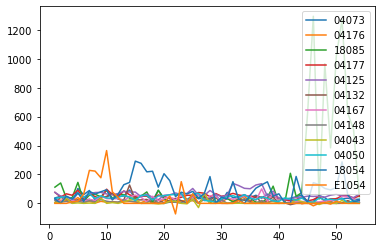

In [60]:
c2.set_index(col,inplace=True)
c2.T.plot()

In [61]:
c2

,1,2,3,4,5,6,7,8,9,10,...,45,46,47,48,49,50,51,52,53,54
04073,37,49,25,8,103,60,89,23,44,43,...,12,13,54,39,10,34,30,36,26,29
04176,29,21,19,14,40,6,14,2,14,8,...,5,-17,0,19,10,0,0,11,5,1
18085,112,141,35,39,145,15,57,63,45,90,...,626,1294,30,966,384,1017,1270,623,511,47
04177,76,44,66,56,91,35,65,47,32,98,...,17,26,47,17,32,31,53,56,35,52
04125,76,50,45,19,69,41,64,75,76,65,...,50,48,50,43,57,63,51,50,40,64
04132,5,42,27,16,25,20,28,11,38,48,...,0,0,0,0,0,0,4,19,3,9
04167,29,14,46,20,10,15,27,20,49,33,...,13,10,10,17,22,16,47,45,30,7
04148,20,8,14,2,15,5,19,9,26,15,...,2,4,1,2,3,0,1,2,1,5
04043,6,6,34,0,3,0,2,0,36,0,...,0,9,-8,5,0,0,20,0,0,0
04050,32,42,45,31,72,42,65,34,52,37,...,13,6,38,24,29,22,36,1,21,3


In [62]:
#next, buat dia kayak mejeneng time series seperti biasanya, which is datanya ke bawah, tapi di average per tanggal 
new_c2=[]
time=[]
for idx,a in enumerate(c2):
    new_c2.append(c2[a].mean())
    time.append(idx)


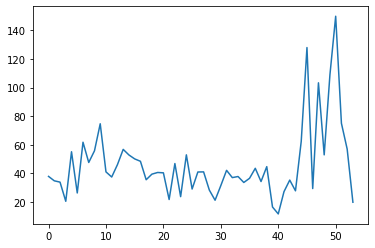

In [86]:
import matplotlib.pyplot as plt
plt.plot(time,new_c2)
plt.show()

In [63]:
#normalisasi, karena gap nya ada yang sampe ribuan, biar lebih gampang tugas ann nya
series=new_c2
# min = np.min(series)
# max = np.max(series)
# series = series - min
# series = series / (max-min)
time = np.array(time)

In [64]:
split_time = 6 # ini berapa bulan terkahir yang mau di potong buat pengujian?

time_train = time[:-split_time]
x_train =  series[:-split_time]
time_valid =  time[-split_time:]
x_valid =  series[-split_time:]

In [142]:
#buat data biar dibagi per window, jadi me masang masangkan waktu dan value,
window_size = 2
batch_size = 2
shuffle_buffer_size = 20

train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
valid_set = windowed_dataset(x_valid, window_size, batch_size, shuffle_buffer_size)

In [143]:
from tensorflow.keras.callbacks import  EarlyStopping
callbacks = EarlyStopping(
    min_delta=0.000001,
    
    patience=100,
    restore_best_weights=True,
)

In [162]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(15, input_shape=[None, 1]),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
        # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
        
        # tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        # tf.keras.layers.Dense(512, activation='relu',kernel_regularizer=tf.keras.regularizers.l1(l1=0.01)),
        # tf.keras.layers.Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation='relu')
    ])

    #the blstm part

In [163]:
#Using mae and mse
#model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),metrics=['mae'],loss='mse')
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-4,momentum=0.9),metrics=['mae'],loss='mse')
model.summary()
hist=model.fit(train_set,epochs=300,validation_data=valid_set, batch_size=16, callbacks=[callbacks])

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, None, 15)          30        
                                                                 
 bidirectional_23 (Bidirecti  (None, 256)              147456    
 onal)                                                           
                                                                 
 dense_45 (Dense)            (None, 512)               131584    
                                                                 
 dropout_12 (Dropout)        (None, 512)               0         
                                                                 
 dense_46 (Dense)            (None, 64)                32832     
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                     

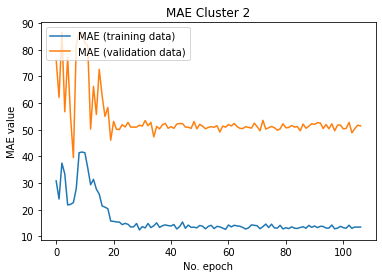

In [164]:
import matplotlib.pyplot as plt
plt.plot(hist.history['mae'], label='MAE (training data)')
plt.plot(hist.history['val_mae'], label='MAE (validation data)')

plt.title("MAE Cluster 2")
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

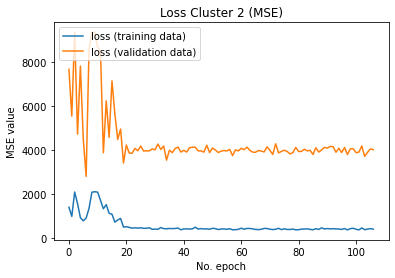

In [165]:
plt.plot(hist.history['loss'], label='loss (training data)')
plt.plot(hist.history['val_loss'], label='loss (validation data)')

plt.title("Loss Cluster 2 (MSE)")
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [166]:
prediksi=model.predict(valid_set)
prediksi

2/2 [==============================] - 1s 17ms/step


array([[56.099075],
       [56.09904 ],
       [56.09807 ],
       [56.098698]], dtype=float32)

In [167]:
prediksi=prediksi.flatten()

In [168]:
hasil=np.concatenate((series[:-split_time+2],prediksi))

In [169]:
hasil

array([ 37.83333333,  34.75      ,  33.83333333,  20.41666667,
        55.08333333,  26.25      ,  61.75      ,  47.58333333,
        55.75      ,  74.66666667,  41.        ,  37.41666667,
        46.08333333,  56.75      ,  52.83333333,  50.08333333,
        48.41666667,  35.5       ,  39.41666667,  40.58333333,
        40.33333333,  21.66666667,  46.83333333,  23.66666667,
        52.91666667,  29.        ,  40.91666667,  41.        ,
        28.25      ,  21.16666667,  31.41666667,  42.08333333,
        37.        ,  37.75      ,  33.58333333,  36.5       ,
        43.5       ,  34.25      ,  44.66666667,  16.41666667,
        11.58333333,  27.16666667,  35.25      ,  27.75      ,
        62.33333333, 128.        ,  29.33333333, 103.33333333,
        52.91666667, 109.        ,  56.09907532,  56.09904099,
        56.09806824,  56.09869766])

[]

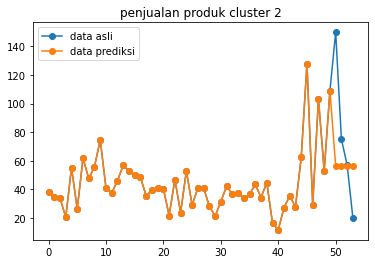

In [170]:
plt.plot(series,marker = 'o',label='data asli')
plt.plot(hasil,marker = 'o',label='data prediksi')
plt.title('penjualan produk cluster 2')
plt.legend()
plt.plot()

In [132]:
# model.save('cluster2_newdata.h5')

# Satu Produk

2/2 [==============================] - 1s 16ms/step


[]

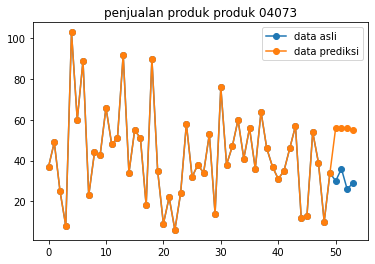

In [171]:
# Satu Produk
new_c2 = c2.sample()
new_c2
series=new_c2.values
# min = np.min(series)
# max = np.max(series)
# series = series - min
# series = series / (max-min)
time = np.array(time)
split_time = 6 
series_t = series[0,-split_time:]
series_t
# series_t= series_t.reshape(-1,1)
series_t
test_set = windowed_dataset(series_t, window_size, batch_size, shuffle_buffer_size)
prediksi=model.predict(test_set)
prediksi
prediksi = prediksi.flatten()
asli = series.flatten()
hasil=np.concatenate((series[0,:-split_time+2],prediksi))
asli
hasil
plt.plot(asli,marker = 'o',label='data asli')
plt.plot(hasil,marker = 'o',label='data prediksi')
plt.title('penjualan produk produk '+str(new_c2.index[0]))
plt.legend()
plt.plot()
